<a href="https://colab.research.google.com/github/T0whed/Bangla-Digit-Recognition-CNN/blob/main/Day_2OfBengaliDigit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install torch torchvision torchaudio numpy pandas scikit-learn matplotlib pillow albumentations opencv-python

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("BengaliAI/numta")

print("Path to dataset files:", path)

100%|██████████| 1.91G/1.91G [00:18<00:00, 110MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/BengaliAI/numta/versions/4


In [2]:
import os

In [3]:
print(os.listdir("."))

folder = "data"
file = "image.png"
print(os.path.join(folder,file))

['.config', 'sample_data']
data/image.png


In [4]:
import matplotlib.pyplot as plt
import cv2

print(os.listdir(path))
subfolder = os.path.join(path, 'training-a')
print('Files in training-a: ', os.listdir(subfolder)[:10])

NameError: name 'path' is not defined

In [5]:
sample_path = os.path.join(path, 'training-a', 'a17000.png')
img = cv2.imread(sample_path, cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap = 'gray')
plt.title('Sample NumtaDB image')
plt.show()

NameError: name 'path' is not defined

In [ ]:
import os
print(os.listdir())

['.config', 'sample_data']


In [ ]:
os.chdir('/content/sample_data/')

In [ ]:
os.getcwd()

'/content/sample_data'

In [ ]:
os.listdir()

['anscombe.json',
 'README.md',
 'california_housing_test.csv',
 'california_housing_train.csv',
 'mnist_train_small.csv',
 'mnist_test.csv']

In [ ]:
print(path)

/root/.cache/kagglehub/datasets/BengaliAI/numta/versions/4


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
!ls /content/drive/MyDrive/


In [ ]:
!unzip "/content/drive/MyDrive/Datasets/numta.zip" -d ./data

import os
print(os.listdir("./data"))  # should show training-a, training-b, etc.

unzip:  cannot find or open /content/drive/MyDrive/Datasets/numta.zip, /content/drive/MyDrive/Datasets/numta.zip.zip or /content/drive/MyDrive/Datasets/numta.zip.ZIP.


FileNotFoundError: [Errno 2] No such file or directory: './data'

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

!unzip "/content/drive/MyDrive/DataSets/numta.zip" -d ./data

import os
#print(os.listdir("./data"))  # should now show training-a, training-b, etc.


In [ ]:
dataset_path = "./data"

subfolders = os.listdir(dataset_path);
subfolders

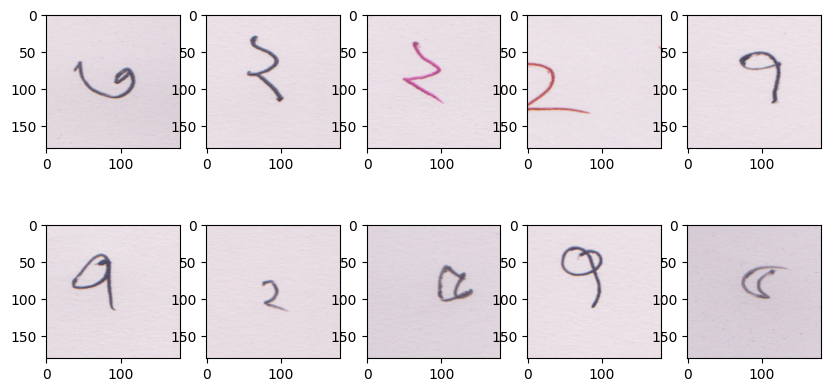

In [11]:
import matplotlib.pyplot as plt
import cv2
import random

sample_folder = os.path.join(dataset_path, 'training-a')
files = os.listdir(sample_folder)

plt.figure(figsize = (10,5))
for i in range(10):
  img_path = os.path.join(sample_folder, random.choice(files))
  img = cv2.imread(img_path, cv2.IMREAD_ANYCOLOR)
  plt.subplot(2,5,i+1)
  plt.imshow(img, cmap = 'gray')


plt.show()

In [12]:
import numpy as np

def preprocess_image(img_path):
  img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
  img = cv2.resize(img,(28,28))
  img = img / 255.0
  return img

In [15]:
def load_data(folder, label):
  X, y = [], []

  for img_file in os.listdir(folder):
    img_path = os.path.join(folder, img_file)

    try:
      img = preprocess_image(img_path)
      X.append(img)
      y.append(label)
    except:
      pass

  return np.array(X), np.array(y)

X,y = load_data(os.path.join(dataset_path, 'training-a'),0)
print('Shape:', X.shape, 'Lables:', y.shape)

Shape: (19702, 28, 28) Lables: (19702,)


In [18]:
train_folders = ["training-a", "training-b", "training-c", "training-d", "training-e"]


X_total, y_total = [], []
for i, folder in enumerate(train_folders):
  X, y = load_data(os.path.join(dataset_path, folder),i)
  X_total.append(X)
  y_total.append(y)

X_total = np.concatenate(X_total)
y_total = np.concatenate(y_total)

print('Dataset Shape:', X_total.shape, y_total.shape)

Dataset Shape: (72045, 28, 28) (72045,)


In [17]:
print(os.listdir("./data"))

['training-a', 'testing-e', 'testing-d', 'training-d', 'training-a.csv', 'testing-c', 'training-e.csv', 'training-c.csv', 'training-d.csv', 'training-b.csv', 'training-c', 'testing-augc', 'testing-f', 'training-e', 'testing-auga', 'training-b', 'testing-a', 'testing-b', 'testing-all-corrected']


In [ ]:
train_folders = [f for f in os.listdir(dataset_path) if f.startswith("training-") and os.path.isdir(os.path.join(dataset_path, f))]
train_folders.sort()

X_list, y_list = [], []
for i, folder in enumerate(train_folders):
  folder_path = os.path.join(dataset_path, folder)
  X,y = load_data(folder_path, i)
  X_list.append(X)
  y_list.append(y)

X_total = np.concatenate(X_list, axis = 0)
y_total = np.concatenate(y_list, axis = 0)

print("All data shape: ", X_total, y_total)

In [26]:
from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import Dataset, DataLoader

X_total = X_total.reshape(-1, 1, 28, 28).astype(np.float32)
y_total = y_total.astype(np.int64)

X_train, X_val, y_train, y_val = train_test_split(
    X_total, y_total, test_size = 0.2, random_state = 17,
    stratify = y_total
)
print('Train:', X_train.shape, y_train.shape)
print('Validation', X_val.shape, y_val.shape)

Train: (57636, 1, 28, 28) (57636,)
Validation (14409, 1, 28, 28) (14409,)


In [27]:
class NumtaDataset(Dataset):
  def __init__(self, X, y):
    self.X = torch.tensor(X)
    self.y = torch.tensor(y)

  def __len__(self):
    return len(self.X)

  def __getitem__(self, index):
    return self.X[index], self.y[index]

train_dataset = NumtaDataset(X_train, y_train)
val_dataset = NumtaDataset(X_val, y_val)

train_loader = DataLoader(train_dataset, batch_size = 64, shuffle = True)
val_loader = DataLoader(val_dataset, batch_size = 64, shuffle = False)

print("Number of batches (train):", len(train_loader))
print("Number of batches (val):", len(val_loader))

Number of batches (train): 901
Number of batches (val): 226
